In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
def create_train_test_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)
    return X_train, X_test, Y_train, Y_test

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [17]:
import os
df = pd.read_csv("data" + os.sep + "mbti_preprocessed_complete.csv")
df.head()

,Unnamed: 0,type,posts,encodedType,preprocessed_posts,extro_intro,intu_obs,feel_think,prosp_judg
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,"['youtube', 'tumblr', 'enfp', 'intj', 'moment'...",0,1,1,0
1,1,ENTP,'I'm finding the lack of me in these posts ver...,3,"['im', 'finding', 'the', 'lack', 'of', 'post',...",1,1,0,1
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,11,"['good', 'one', 'youtube', 'of', 'course', 'i'...",0,1,0,1
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,"['dear', 'intp', 'i', 'enjoyed', 'conversation...",0,1,0,0
4,4,ENTJ,'You're fired.|||That's another silly misconce...,2,"['youre', 'fired', 'thats', 'another', 'silly'...",1,1,0,0


In [18]:
X = df.iloc[:,4].values
Y_EI = df.iloc[:,5].values # E Extroverted (1) - I Introverted (0)
Y_NS = df.iloc[:,6].values # N Intuitive (1) - S Observant (0)
Y_FT = df.iloc[:,7].values # F Feeling (1) - T Thinking (0)
Y_PJ = df.iloc[:,8].values # P Prospective (1) - J Judging (0)
print('Extroverted (1) - Introverted (0)')
display(pd.DataFrame(Y_EI).value_counts())
print('Intuitive (1) -  Observant (0)')
display(pd.DataFrame(Y_NS).value_counts())
print('Feeling (1) - Thinking (0)')
display(pd.DataFrame(Y_FT).value_counts())
print('Prospective (1) - Judging (0)')
display(pd.DataFrame(Y_PJ).value_counts())

tf_idf_vectorizer = TfidfVectorizer(use_idf=True, min_df = 0.1, max_df = 0.3)

X = tf_idf_vectorizer.fit_transform(X).toarray()

Extroverted (1) - Introverted (0)


0    6676
1    1999
dtype: int64

Intuitive (1) -  Observant (0)


1    7478
0    1197
dtype: int64

Feeling (1) - Thinking (0)


1    4694
0    3981
dtype: int64

Prospective (1) - Judging (0)


1    5241
0    3434
dtype: int64

In [19]:

X_train, X_test, Y_train_EI, Y_test_EI = create_train_test_split(X, Y_EI)
X_train, X_test, Y_train_NS, Y_test_NS = create_train_test_split(X, Y_NS)
X_train, X_test, Y_train_FT, Y_test_FT = create_train_test_split(X, Y_FT)
X_train, X_test, Y_train_PJ, Y_test_PJ = create_train_test_split(X, Y_PJ)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

Extroverted - Introverted

In [21]:
model.fit(X_train, Y_train_EI)

LogisticRegression()

In [22]:
predict_EI = model.predict(X_test)

In [23]:
print("Classification Report:")
print(classification_report(Y_test_EI, predict_EI, target_names=['I','E']))

Classification Report:
              precision    recall  f1-score   support

           I       0.84      0.95      0.89      2002
           E       0.70      0.39      0.50       601

    accuracy                           0.82      2603
   macro avg       0.77      0.67      0.70      2603
weighted avg       0.81      0.82      0.80      2603



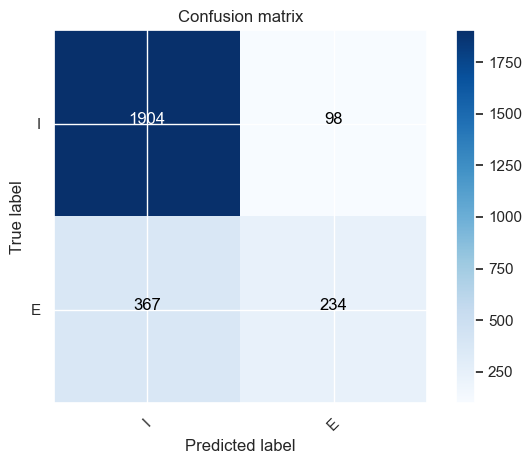

In [24]:
cnf = confusion_matrix(Y_test_EI, predict_EI)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','E'])

In [26]:
model.fit(X_train, Y_train_NS)
predict_NS = model.predict(X_test)


NS: Intuitive - Observant


In [27]:
print("Classification Report:")
print(classification_report(Y_test_NS, predict_NS, target_names=['S','N']))

Classification Report:
              precision    recall  f1-score   support

           S       0.67      0.20      0.31       342
           N       0.89      0.99      0.94      2261

    accuracy                           0.88      2603
   macro avg       0.78      0.59      0.62      2603
weighted avg       0.86      0.88      0.85      2603



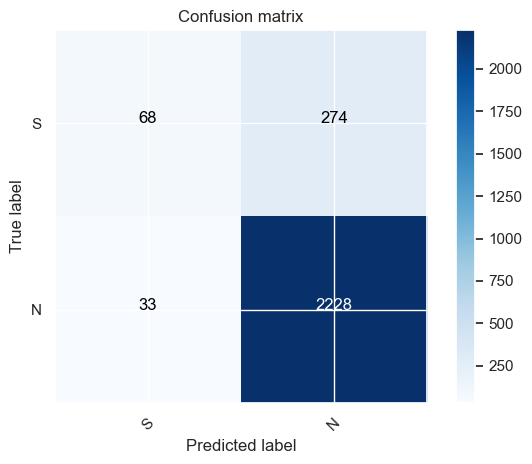

In [28]:
cnf = confusion_matrix(Y_test_NS, predict_NS)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['S','N'])

Feeling - Thinking

In [29]:
model.fit(X_train, Y_train_FT)
predict_FT = model.predict(X_test)


In [30]:
print("Classification Report:")
print(classification_report(Y_test_FT, predict_FT, target_names=['T','F']))

Classification Report:
              precision    recall  f1-score   support

           T       0.80      0.76      0.78      1199
           F       0.80      0.84      0.82      1404

    accuracy                           0.80      2603
   macro avg       0.80      0.80      0.80      2603
weighted avg       0.80      0.80      0.80      2603



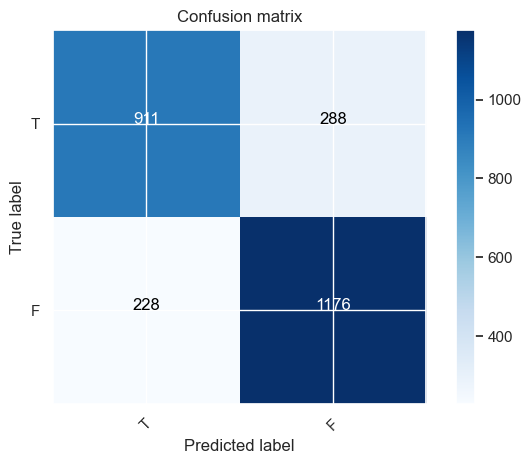

In [31]:
cnf = confusion_matrix(Y_test_FT, predict_FT)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['T','F'])

Prospective - Judging

In [32]:
model.fit(X_train, Y_train_PJ)
predict_PJ = model.predict(X_test)


In [33]:
print("Classification Report:")
print(classification_report(Y_test_PJ, predict_PJ, target_names=['J','P']))

Classification Report:
              precision    recall  f1-score   support

           J       0.75      0.53      0.62      1071
           P       0.73      0.88      0.80      1532

    accuracy                           0.74      2603
   macro avg       0.74      0.71      0.71      2603
weighted avg       0.74      0.74      0.73      2603



In [34]:
df1 = df[['encodedType', 'extro_intro', 'intu_obs', 'feel_think', 'prosp_judg']].drop_duplicates().reset_index(drop=True)
df1

,encodedType,extro_intro,intu_obs,feel_think,prosp_judg
0,8,0,1,1,0
1,3,1,1,0,1
2,11,0,1,0,1
3,10,0,1,0,0
4,2,1,1,0,0
5,0,1,1,1,0
6,9,0,1,1,1
7,1,1,1,1,1
8,13,0,0,1,1
9,15,0,0,0,1


In [35]:
Y_test_df = pd.DataFrame(np.transpose([Y_test_EI, Y_test_PJ, Y_test_NS, Y_test_FT]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
Y_test_df = Y_test_df.merge(df1, how = 'left', on = Y_test_df.columns.tolist())
Y_test_df

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType
0,1,0,1,1,5
1,0,1,1,0,8
2,1,0,1,0,4
3,0,1,1,0,8
4,0,0,1,0,12
...,...,...,...,...,...
2598,0,1,1,0,8
2599,0,1,1,0,8
2600,0,0,1,1,13
2601,0,0,1,0,12


In [37]:
predict_df = pd.DataFrame(np.transpose([predict_EI, predict_PJ, predict_NS, predict_FT]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
predict_df = predict_df.merge(df1, how = 'left', on = predict_df.columns.tolist())
predict_df

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType
0,0,0,1,1,13
1,0,1,0,0,10
2,0,1,1,0,8
3,0,1,1,0,8
4,0,0,1,0,12
...,...,...,...,...,...
2598,0,1,1,0,8
2599,0,1,1,0,8
2600,1,0,1,1,5
2601,0,0,1,0,12


In [39]:
print("Classification Report:")
print(classification_report(Y_test_df['encodedType'].values, predict_df['encodedType'].values))
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(Y_test_df['encodedType'].values, predict_df['encodedType'].values, average='micro'))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       196
           1       0.49      0.26      0.34       212
           2       0.33      0.04      0.06        28
           3       0.00      0.00      0.00        14
           4       0.41      0.15      0.22        74
           5       0.13      0.07      0.09        55
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        11
           8       0.38      0.64      0.48       378
           9       0.46      0.74      0.57       545
          10       0.51      0.21      0.30        86
          11       0.32      0.12      0.18        73
          12       0.52      0.39      0.45       365
          13       0.52      0.47      0.49       436
          14       0.45      0.08      0.14        61
          15       0.60      0.21      0.31        58

    accuracy                           0.46      2603
   

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
